# Bagging Regression

## 1. Introduction to Bagging
**Bagging** (Bootstrap Aggregating) is an ensemble technique that improves model stability and accuracy by combining predictions from multiple models trained on different random subsets of the training data.

- **Bootstrap**: Sampling with replacement from the dataset.
- **Aggregation**: Combining predictions (for regression: average of predictions).

**Key Advantages:**
- Reduces variance (overfitting risk).
- Works well with unstable models like decision trees.
- Can parallelize training since models are independent.

**Key Disadvantage:**
- Slightly increases bias compared to a single model.
- Computationally more expensive.

---

## 2. Bagging Regressor in scikit-learn
`sklearn.ensemble.BaggingRegressor` allows us to:
- Choose a **base estimator** (default: DecisionTreeRegressor).
- Control **n_estimators** (number of base models).
- Decide **max_samples** and **max_features** for each model.

**Main Parameters:**
- `base_estimator`: The algorithm to be bagged.
- `n_estimators`: Number of base estimators in the ensemble.
- `max_samples`: Fraction/number of samples per base estimator.
- `max_features`: Fraction/number of features per base estimator.
- `bootstrap`: Whether samples are drawn with replacement.
- `n_jobs`: Number of parallel jobs.

**When to use:**
- When a single model overfits and is unstable.
- When you have enough computational resources to train multiple models.


In [1]:
# Bagging Regressor Tutorial using Scikit-Learn
# Author: [Your Name]
# Date: [Today's Date]

# ----------------------------------------------------------
# 1. IMPORT LIBRARIES
# ----------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------------
# 2. LOAD DATASET
# ----------------------------------------------------------
# Fetch California Housing dataset from sklearn
california = fetch_california_housing(as_frame=True)
df = california.frame

# Display first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Dataset shape: (20640, 9)


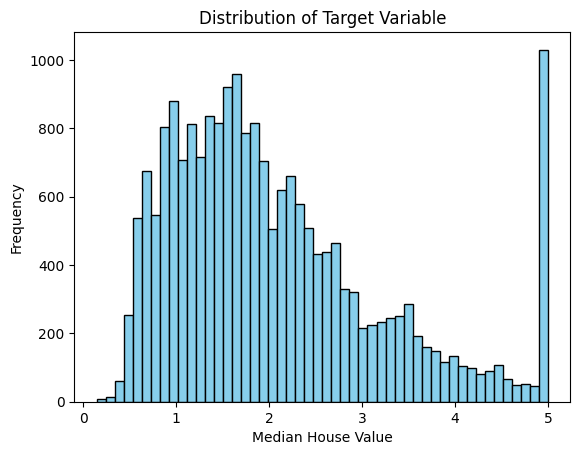

In [8]:
# Check dataset shape and description
print("Dataset shape:", df.shape)

# Quick stats
df.describe()

# Check for missing values
df.isnull().sum()

# Quick visualization: target distribution
plt.hist(df['MedHouseVal'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Target Variable")
plt.show()


In [3]:
# Features and target
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features (Bagging doesn't require scaling for trees, but good for other models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Initialize base estimator
base_tree = DecisionTreeRegressor(random_state=42)

# Initialize Bagging Regressor
bagging_reg = BaggingRegressor(
    estimator=base_tree,
    n_estimators=50,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Train model
bagging_reg.fit(X_train_scaled, y_train)


BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),
                 max_samples=0.8, n_estimators=50, n_jobs=-1, random_state=42)

In [5]:
# Predictions
y_pred = bagging_reg.predict(X_test_scaled)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


RMSE: 0.513
R² Score: 0.799


In [6]:
# Train single Decision Tree
single_tree = DecisionTreeRegressor(random_state=42)
single_tree.fit(X_train_scaled, y_train)
y_pred_single = single_tree.predict(X_test_scaled)

# Metrics for single tree
rmse_single = np.sqrt(mean_squared_error(y_test, y_pred_single))
r2_single = r2_score(y_test, y_pred_single)

print(f"Single Tree RMSE: {rmse_single:.3f}, R²: {r2_single:.3f}")
print(f"Bagging RMSE: {rmse:.3f}, R²: {r2:.3f}")


Single Tree RMSE: 0.706, R²: 0.620
Bagging RMSE: 0.513, R²: 0.799


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 30, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42), random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Best Parameters: {'bootstrap': True, 'max_samples': 1.0, 'n_estimators': 100}
Best R² Score: 0.8002078588440282


## Conclusion

- **Bagging Regressor** works well when:
  - The base estimator is unstable (high variance).
  - You have enough data to bootstrap multiple samples.

- In our case, Bagging with Decision Trees improved the R² score and reduced RMSE compared to a single Decision Tree.

**Advantages:**
- Reduces variance and risk of overfitting.
- Can parallelize training.

**Limitations:**
- More computationally expensive.
- Slight increase in bias.
- Doesn't always outperform boosting methods like Gradient Boosting or XGBoost.

---

**Next Steps:**
- Try different base estimators (e.g., SVR, Linear Regression).
- Experiment with `max_features` and `max_samples`.
- Combine Bagging with feature engineering for further gains.
